In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

In [2]:
import astromet
import numpy as np
import matplotlib.pyplot as plt

# an object wich holds all the necessary parameters to generate the astrometric track
params=astromet.params()

# center of mass parameters
params.ra=160     #[deg]
params.dec=-50    #[deg]
params.drac=0     #[mas]
params.ddec=0     #[mas]
params.pmrac=4    #[mas/yr]
params.pmdec=3   #[mas/yr]
params.parallax=2     #[mas]

In [3]:
# random times - a very rough approximation to Gaia eDR3
ts=2014 + 4*np.sort(np.random.rand(100))

# optionally use the much simpler Kepler equation solver if numba causes errors
#astromet.use_backup=True

# finds the exact position in RAcos(Dec) and Dec [mas]
racs,decs=astromet.track(ts,params)

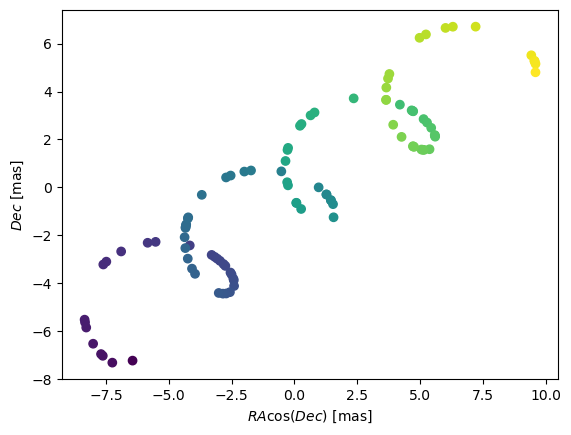

In [4]:
ax=plt.gca()
ax.scatter(racs,decs,c=ts)
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
#plt.savefig('docs/plots/singleBody.png')
plt.show()

In [5]:
# binary parameters
# (for single stars leave these blank or set l=q)
params.period=2      #[yr]
params.a=2    #[AU]
params.e=0.5
params.q=0.5
params.l=0.1
# viewing angle
params.vphi=4.5   #[rad]
params.vtheta=1.5 #[rad]
params.vomega=5.6 #[rad]
# time of some periapse passage
params.tperi=2016 #[jyear]

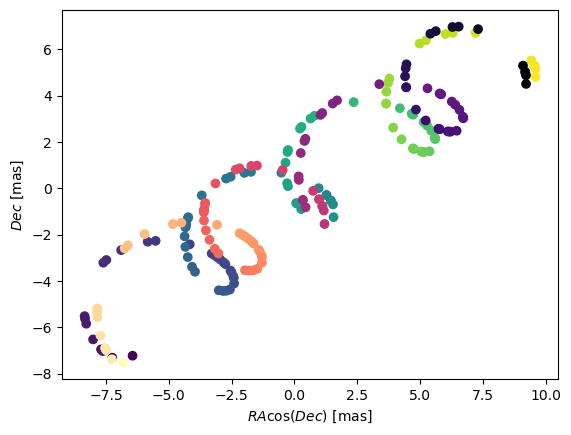

In [6]:
bracs,bdecs=astromet.track(ts,params)

ax=plt.gca()
ax.scatter(racs,decs,c=ts)
ax.scatter(bracs,bdecs,c=ts,cmap='magma_r')
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
#plt.savefig('docs/plots/twoBody.png')
plt.show()

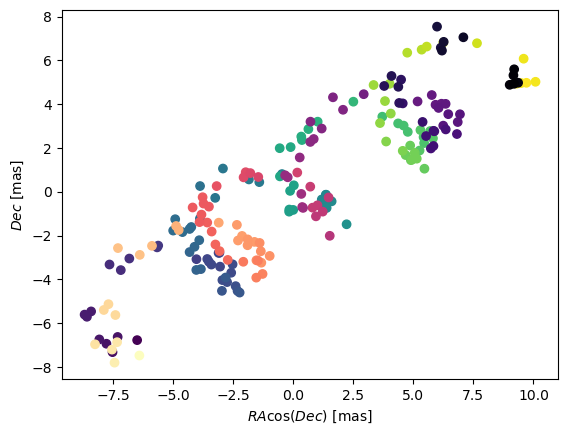

In [7]:
ast_error=0.3 # [mas]

obsracs=racs+ast_error*np.random.randn(ts.size)
obsdecs=decs+ast_error*np.random.randn(ts.size)

bobsracs=bracs+ast_error*np.random.randn(ts.size)
bobsdecs=bdecs+ast_error*np.random.randn(ts.size)

ax=plt.gca()
ax.scatter(obsracs,obsdecs,c=ts)
ax.scatter(bobsracs,bobsdecs,c=ts,cmap='magma_r')
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
#plt.savefig('docs/plots/twoBodyError.png')
plt.show()

In [8]:
results=astromet.simple_fit(ts,obsracs,obsdecs,ast_error,params.ra,params.dec)
print(results)

{'vis_periods': 73, 'n_obs': 100, 'drac': -0.016922453597580423, 'drac_error': 0.029064661659181475, 'ddec': -0.03529431348783746, 'ddec_error': 0.029076841922243937, 'drac_ddec_corr': -0.0004889877311186546, 'parallax': 1.985096349129482, 'parallax_error': 0.03191649264188921, 'drac_parallax_corr': -0.015001586985287812, 'ddec_parallax_corr': 0.03259573347794531, 'pmrac': 4.039031725853254, 'pmrac_error': 0.026252503289273036, 'drac_pmrac_corr': 0.0031895836214495318, 'ddec_pmrac_corr': -0.001911057557115192, 'parallax_pmrac_corr': -0.058629070531830134, 'pmdec': 3.0107284931648706, 'pmdec_error': 0.02621035603015932, 'drac_pmdec_corr': 0.00022739607287898257, 'ddec_pmdec_corr': 0.001818709429140544, 'parallax_pmdec_corr': -0.015158134476171876, 'pmrac_pmdec_corr': 0.0008887073353344472, 'uwe': 0.9687104394275982, 'ra_ref': 160, 'dec_ref': -50}


In [9]:
bresults=astromet.simple_fit(ts,bobsracs,bobsdecs,ast_error,params.ra,params.dec)
print(bresults)

{'vis_periods': 73, 'n_obs': 100, 'drac': 0.6286746892491553, 'drac_error': 0.052636139031588695, 'ddec': 0.5496384981492268, 'ddec_error': 0.05265819750340286, 'drac_ddec_corr': -0.0004889877311186546, 'parallax': 1.9912780567710247, 'parallax_error': 0.05780080854883998, 'drac_parallax_corr': -0.015001586985287814, 'ddec_parallax_corr': 0.03259573347794531, 'pmrac': 3.9365644808350364, 'pmrac_error': 0.047543316666302814, 'drac_pmrac_corr': 0.0031895836214495313, 'ddec_pmrac_corr': -0.0019110575571151917, 'parallax_pmrac_corr': -0.058629070531830134, 'pmdec': 3.042630951466972, 'pmdec_error': 0.047466987926731576, 'drac_pmdec_corr': 0.00022739607287898257, 'ddec_pmdec_corr': 0.0018187094291405438, 'parallax_pmdec_corr': -0.015158134476171878, 'pmrac_pmdec_corr': 0.0008887073353344472, 'uwe': 1.7543358312225543, 'ra_ref': 160, 'dec_ref': -50}


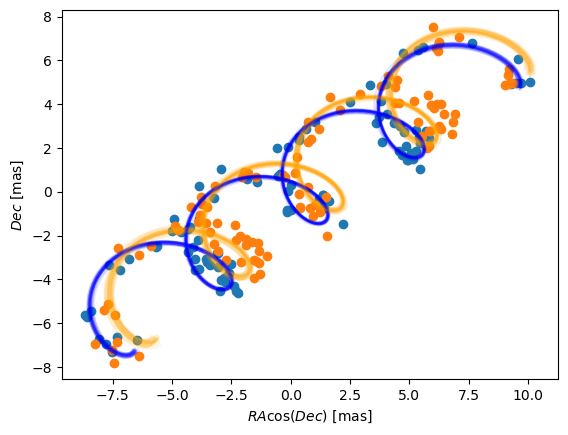

In [10]:
ax=plt.gca()
ax.scatter(obsracs,obsdecs)
ax.scatter(bobsracs,bobsdecs)

plotts=np.linspace(np.min(ts),np.max(ts),200)
fitparams=astromet.params()
bfitparams=astromet.params()
for i in range(32):
    fitparams.ra=160     #[deg]
    fitparams.dec=-50    #[deg]
    fitparams.drac=results['drac']+results['drac_error']*np.random.randn()     #[mas]
    fitparams.ddec=results['ddec']+results['ddec_error']*np.random.randn()     #[mas]
    fitparams.pmrac=results['pmrac']+results['pmrac_error']*np.random.randn()    #[mas/yr]
    fitparams.pmdec=results['pmdec']+results['pmdec_error']*np.random.randn()   #[mas/yr]
    fitparams.parallax=results['parallax']+results['parallax_error']*np.random.randn()     #[mas]

    fitracs,fitdecs=astromet.track(plotts,fitparams)
    ax.plot(fitracs,fitdecs,c='blue',alpha=0.1)

    bfitparams.ra=160     #[deg]
    bfitparams.dec=-50    #[deg]
    bfitparams.drac=bresults['drac']+bresults['drac_error']*np.random.randn()     #[mas]
    bfitparams.ddec=bresults['ddec']+bresults['ddec_error']*np.random.randn()     #[mas]
    bfitparams.pmrac=bresults['pmrac']+bresults['pmrac_error']*np.random.randn()    #[mas/yr]
    bfitparams.pmdec=bresults['pmdec']+bresults['pmdec_error']*np.random.randn()   #[mas/yr]
    bfitparams.parallax=bresults['parallax']+bresults['parallax_error']*np.random.randn()     #[mas]    

    bfitracs,bfitdecs=astromet.track(plotts,bfitparams)
    ax.plot(bfitracs,bfitdecs,c='orange',alpha=0.1)

ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
#plt.savefig('docs/plots/twoBodyFit.png')
plt.show()

In [14]:
import dev.astromet.astromet as astromet
import numpy as np
import matplotlib.pyplot as plt

ra=160
dec=-50

ts=np.sort(2016+(34/12)*np.random.rand(100))
phis=-180+360*np.random.rand(100)

# if scanning law can be used
import scanninglaw.times
c=scanninglaw.source.Source(ra,dec,unit='deg')

dr3_sl=scanninglaw.times.Times(version='dr3_nominal')
sl=dr3_sl(c, return_times=True, return_angles=True)

ts=np.squeeze(np.hstack(sl['times'])).astype('double')
sort=np.argsort(ts)
ts=2010+ts[sort]/365.25
phis=np.squeeze(np.hstack(sl['angles']))[sort].astype('double')

ModuleNotFoundError: No module named 'scanninglaw.times'

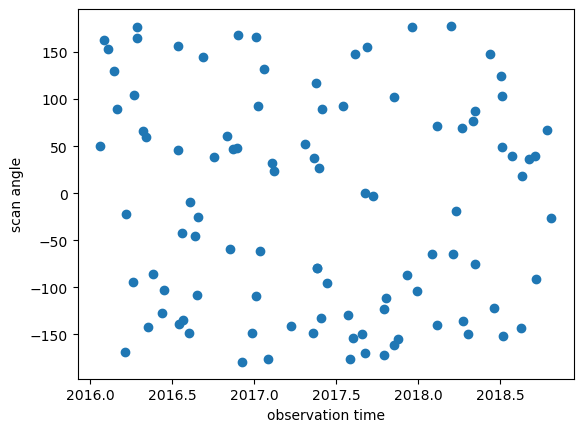

In [15]:
ax=plt.gca()
ax.scatter(ts,phis)
ax.set_xlabel(r'observation time')
ax.set_ylabel(r'scan angle')
#plt.savefig('docs/plots/scanningLaw.png')
plt.show()

In [16]:
params=astromet.params()

params.ra=ra
params.dec=dec
params.drac=0
params.ddec=0
params.pmrac=8
params.pmdec=-2
params.parallax=5

params.period=2
params.a=2 
params.e=0.5
params.q=0.5
params.l=0.1

params.vphi=4.5
params.vtheta=1.5
params.vomega=5.6

params.tperi=2016

racs,decs=astromet.track(ts,params)

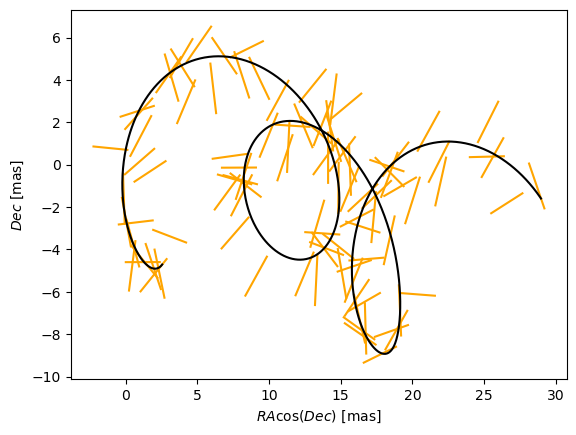

In [19]:
mag=18
al_error=astromet.sigma_ast(mag) # about 1.1 mas at this magnitude
errs=al_error*np.random.randn(phis.size)

radphis=np.deg2rad(phis)

obsracs=racs+errs*np.sin(radphis)
obsdecs=decs+errs*np.cos(radphis)

plotts=np.linspace(np.min(ts),np.max(ts),1000)
plotracs,plotdecs=astromet.track(plotts,params)

ax=plt.gca()
ax.plot([obsracs-al_error*np.sin(radphis),obsracs+al_error*np.sin(radphis)],
        [obsdecs-al_error*np.cos(radphis),obsdecs+al_error*np.cos(radphis)],c='orange')
ax.plot(plotracs,plotdecs,c='k')
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
#plt.savefig('docs/plots/twoBodyScans')
plt.show()

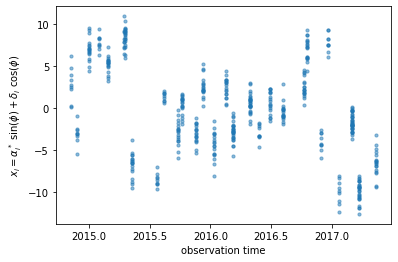

In [18]:
t_obs,x_obs,phi_obs,rac_obs,dec_obs=astromet.mock_obs(ts,phis,racs,decs,err=al_error)

ax=plt.gca()
ax.scatter(t_obs,x_obs,s=10,alpha=0.5)
ax.set_xlabel(r'observation time')
ax.set_ylabel(r'$x_i = \alpha^*_i\ \sin(\phi) + \delta_i\ \cos(\phi)$')
#plt.savefig('docs/plots/scanXs.png')
plt.show()

In [23]:
bresults=astromet.fit(t_obs,x_obs,phi_obs,al_error,ra,dec)
print(bresults)
gresults=astromet.gaia_fit(t_obs,x_obs,phi_obs,al_error,ra,dec)
print(gresults)

{'vis_periods': 27, 'n_obs': 477, 'params_solved': 5, 'drac': -1.6171283773300926, 'drac_error': 0.10037615384510779, 'ddec': -1.2226831523366, 'ddec_error': 0.11038242365998072, 'drac_ddec_corr': 0.21302825773765552, 'parallax': 5.277859971259744, 'parallax_error': 0.13483844562537226, 'drac_parallax_corr': -0.052872670994359446, 'ddec_parallax_corr': 0.06289328141887433, 'pmrac': 7.623439419914979, 'pmrac_error': 0.1338069839199319, 'drac_pmrac_corr': -0.18965432423735637, 'ddec_pmrac_corr': 0.027167437980264553, 'parallax_pmrac_corr': 0.19428859515007607, 'pmdec': -2.267067734571566, 'pmdec_error': 0.1445982092420638, 'drac_pmdec_corr': 0.014967778903621016, 'ddec_pmdec_corr': -0.2395703521452692, 'parallax_pmdec_corr': -0.002380694025381034, 'pmrac_pmdec_corr': 0.20178814356775804, 'excess_noise': 0.9523963620056608, 'chi2': 871.4482146311552, 'n_good_obs': 477, 'uwe': 1.3587820245794555, 'ra_ref': 160, 'dec_ref': -50}
{'astrometric_matched_transits': 53, 'visibility_periods_used':

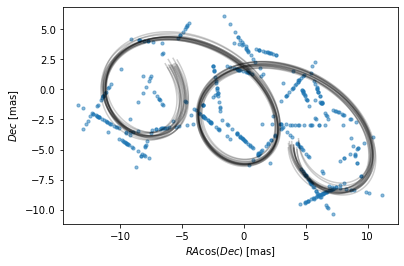

In [26]:
ax=plt.gca()
for i in range(16): # plotting 16 random realizations of the fit including error
    plotts=np.linspace(np.min(ts),np.max(ts),1000)
    
    fit_params=astromet.params()
    fit_params.ra=bresults['ra_ref']
    fit_params.dec=bresults['dec_ref']
    fit_params.drac=bresults['drac']+np.random.randn()*bresults['drac_error']
    fit_params.ddec=bresults['ddec']+np.random.randn()*bresults['ddec_error']
    fit_params.pmrac=bresults['pmrac']+np.random.randn()*bresults['pmrac_error']
    fit_params.pmdec=bresults['pmdec']+np.random.randn()*bresults['pmdec_error']
    fit_params.parallax=bresults['parallax']+np.random.randn()*bresults['parallax_error']
    
    fitracs,fitdecs=astromet.track(plotts,fit_params)
    ax.plot(fitracs,fitdecs,c='k',alpha=0.2)

# plotting the actual Gaia-like observations
ax.scatter(rac_obs,dec_obs,s=10,alpha=0.5)
    
ax.set_xlabel(r'$RA \cos(Dec)$ [mas]')
ax.set_ylabel(r'$Dec$ [mas]')
#plt.savefig('docs/plots/gaiaFit.png')
plt.show()